In [56]:
# KML download 
from zipfile import ZipFile
import cv2, os

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style()

%matplotlib inline

In [108]:
def download_kml(path):
    """ 
    Extracts a KMZ file from path and outputs a KML doc. 
    
    Args:
        path (str): Path to the kmz archive.
        
    Returns:
        kml: Unarchived file read.
        
    """
    
    kmz = ZipFile(path, 'r')
    return kmz.open('doc.kml', 'r').read()

# kml = download_kml('../data/r36208_9_constellation_airbus_ds_nepal_earthquake_28042015.kmz')

def image_struct(path):
    """ 
    Outputs an image path / name dictionary.
    
    Args:
        path (str): Root of the image files. 
        
    Returns:
        dict: Shape of key: tuple containing the class 'after', 'before', and year of recording.
    
    """
    
    struct = {}
    images = os.listdir(path)
    for img in images:
        if 'after' in img:
            incidence = 'after'
        elif 'before' in img:
            incidence = 'before'
        
        try:
            date = int(img.split('_')[-1].split('.jpg')[0])
            struct[(incidence, date)] = img
        except:
            # Not an appropriate structure for the image data.
            pass
    
    return struct

def load_images(path):
    """ 
    Loads image from path and returns a cv2 image file. 
    
    Args: 
        path (str): Path from there the image file should be read.
    
    Returns: 
        nd.array: OpenCV based image to array read implementation from path. 
    
    """
    
    return cv2.imread(path)
    
def image_resize(image, size):
    """ 
    Resizes given image object. 
    
    Args:
        image (nd.array): Image array which should be resized.
        size     (tuple): Structure: (width(float), height(float) - shape of the resized image.
      
    Returns:
        nd.array: Resized image. 
        
    """
    
    return cv2.resize(image, size)

def save_image(image, path):
    """ 
    Writes image to path.
    
    Args:
        image (nd.array): Image array that should be saved. 
        path       (str): Save path.  
    
    """
    
    cv2.imwrite(image, path)
    print(f'Image successfully saved at: {path}')
    
def display_image(image):
    """
    Plots an image using matplotlib pyplot imshow. 
    
    Args:
        image (nd.array): Image that should be visualised. 
    
    """
    
    plt.imshow(image)
    plt.grid(False)
    plt.show()
    
def gaussian_filter(image, shape=(5,5), dx=0, dy=0, ksize=1):
    """
    Applies a Gaussian smoothing filter to an image array. 
    
    Args:
        image (nd.array): Image array which should be smoothed.
        shape    (float): Odd and positive numbers - size of the kernel. 
        dx       (float): Std of x.
        dy       (float): Std of y.
        
    Returns:
        nd.array: Gaussian filter on top of an image numpy array.
    
    """
    
    return cv2.GaussianBlur(image, shape, dx, dy)

def laplace_filter(image, ddepth=cv2.CV_64F, ksize=1):
    """
    Applies Laplace filter to an image array.
    This will identify areas of rapid change.
    
    Args:
        image (nd.array): Image array which should be transformed.
        ksize      (int): Laplace filter type. s
        
    Returns:
        nd.array: Transformed image.
    
    """
    
    return cv2.Laplacian(image, ddepth=ddepth, ksize=ksize)

In [77]:
img_path = '../data/high_res_amatrice/'
struct = image_struct(img_path)
struct

{('after', 2016): 'img_earthquake_after_small_2016.jpg',
 ('after', 2017): 'img_earthquake_after_small_2017.jpg',
 ('before', 2016): 'img_earthquake_before_small_2016.jpg',
 ('before', 2010): 'img_earthquake_before_small_2010.jpg'}

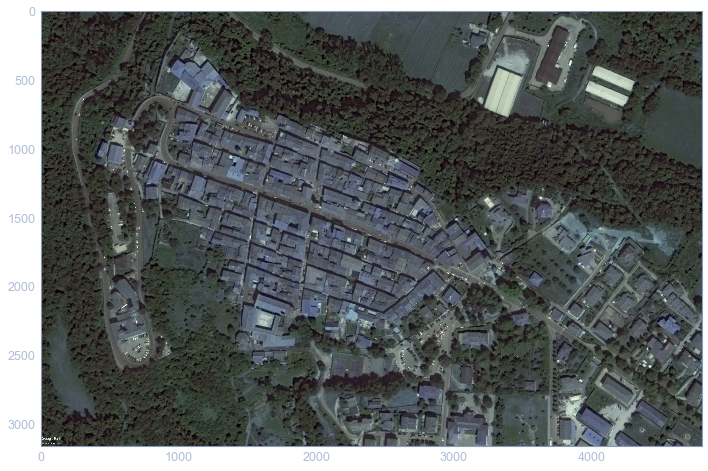

In [120]:
image = load_images(img_path + struct[('before', 2010)])

plt.figure(figsize=(12,8))
display_image(image)

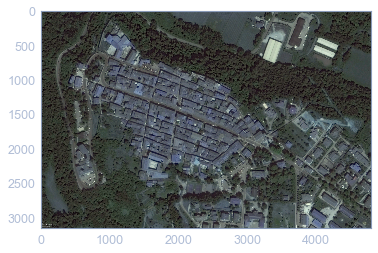

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


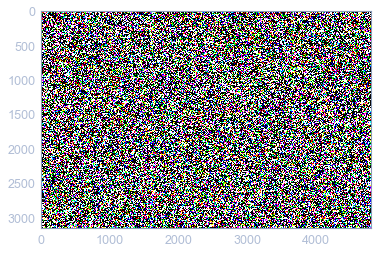

In [127]:
image_smooth = gaussian_filter(image, shape=(7,7))
image_laplace = laplace_filter(image, ddepth=cv2.CV_64F, ksize=1)

display_image(image_smooth)
display_image(image_laplace)

In [128]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary = cv2.GaussianBlur(gray,(5,5),0)
ret,binary = cv2.threshold(binary, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = cv2.adaptiveThreshold(binary, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ret,binary = cv2.threshold(binary, 190, 255, cv2.THRESH_BINARY)

lapl = cv2.Laplacian(image,cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


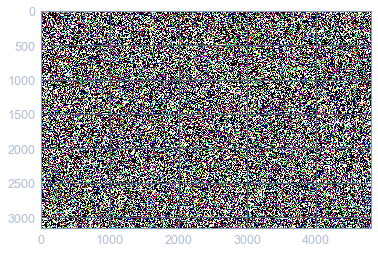

In [129]:
plt.imshow(lapl)

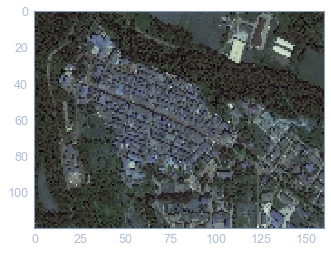

In [102]:
display_image(image_resize(image, (160,120)))